### IMPORTING LIBRARIES

In [312]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency, ttest_ind


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visual style to match the sample
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully.")

Libraries imported successfully.


### DATASET ANALYSIS

In [313]:
# Load the dataset
try:
    df = pd.read_csv('data/Telco-Customer-Churn.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError("CSV not found. Place it in 'data/' or adjust the path.")


Dataset loaded successfully.


In [314]:
# Display first 5 rows
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [315]:
# Check data shape (Rows, Columns)
print(f"\nShape of dataset: {df.shape}")


Shape of dataset: (7043, 21)


In [316]:
# Check data types and existing nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [317]:
# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


### MISSING VALUES ANALYSIS

In [318]:
# Treat blank strings as NaN for missingness analysis
df_missing = df.replace(r'^\s*$', np.nan, regex=True)

missing_counts = df_missing.isna().sum()
missing_pct = (missing_counts / len(df_missing)) * 100

missing_table = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_percent": missing_pct.round(2)
    })
    .sort_values("missing_count", ascending=False)
)

print("\nMissing values (treating blank strings as NaN):")
display(missing_table)


Missing values (treating blank strings as NaN):


,missing_count,missing_percent
TotalCharges,11,0.16
gender,0,0.00
SeniorCitizen,0,0.00
Partner,0,0.00
customerID,0,0.00
Dependents,0,0.00
tenure,0,0.00
MultipleLines,0,0.00
PhoneService,0,0.00
OnlineSecurity,0,0.00


### Data Cleaning

In [319]:
#Handle TotalCharges: convert to numeric, inspect & impute/drop
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
n_tc_na = df["TotalCharges"].isna().sum()
print(f"Rows with non-numeric / missing 'TotalCharges' after conversion: {n_tc_na}")

if n_tc_na > 0:
    # Strategy: impute with median (could also drop, but imputation preserves data)
    median_tc = df["TotalCharges"].median()
    df["TotalCharges"].fillna(median_tc, inplace=True)
    print(f"Imputed missing 'TotalCharges' with median value: {median_tc:.2f}")

# Drop non-informative ID column
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)
    print("Dropped 'customerID' column (identifier only).")

print("\nData types after cleaning:")
df.info()



Rows with non-numeric / missing 'TotalCharges' after conversion: 11
Imputed missing 'TotalCharges' with median value: 1397.47
Dropped 'customerID' column (identifier only).

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-nu

In [320]:
print(df.isna().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### EXPLORATORY DATA ANALYSIS

In [321]:
# Statistical Summary of Numerical Columns
print("--- Statistical Summary (Numerical) ---")
display(df.describe())

--- Statistical Summary (Numerical) ---


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [322]:
# Statistical Summary of Categorical Columns
print("\n--- Statistical Summary (Categorical) ---")
display(df.describe(include=['O']))


--- Statistical Summary (Categorical) ---


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [323]:
# Check Unique Values for key categorical columns
# This helps us identify if there are any typos like "Yes" vs "yes"
print("\n--- Unique Values in 'PaymentMethod' ---")
print(df['PaymentMethod'].unique())

print("\n--- Unique Values in 'Contract' ---")
print(df['Contract'].unique())


--- Unique Values in 'PaymentMethod' ---
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

--- Unique Values in 'Contract' ---
['Month-to-month' 'One year' 'Two year']


In [324]:
# Check Target Variable Balance (Numeric)
print("\n--- Churn Count (Target) ---")
print(df['Churn'].value_counts())

print("\n--- Churn Percentage ---")
print(df['Churn'].value_counts(normalize=True) * 100)


--- Churn Count (Target) ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64

--- Churn Percentage ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


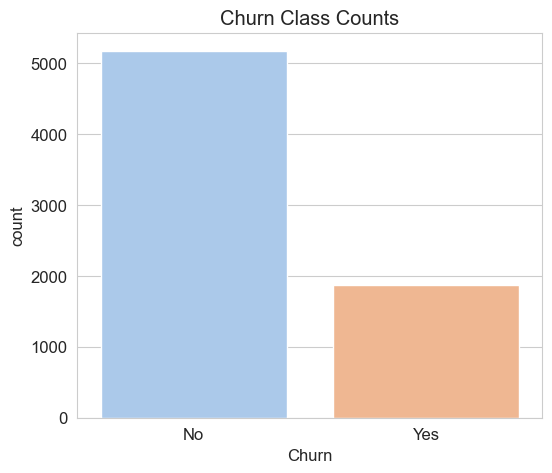

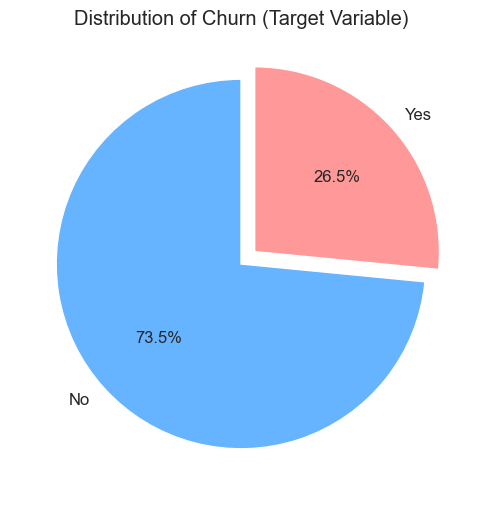

In [325]:
# Target Variable Distribution
# The sample uses Pie Charts for the target class balance.
# Bar plot
plt.figure(figsize=(6, 5))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Churn Class Counts")
plt.show()

#Pie chart
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(
    churn_counts, 
    labels=churn_counts.index, 
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'], 
    startangle=90, 
    explode=(0, 0.1))
plt.title('Distribution of Churn (Target Variable)')
plt.show()

### DATA VISUALIZATION

##### Univariate Distributions

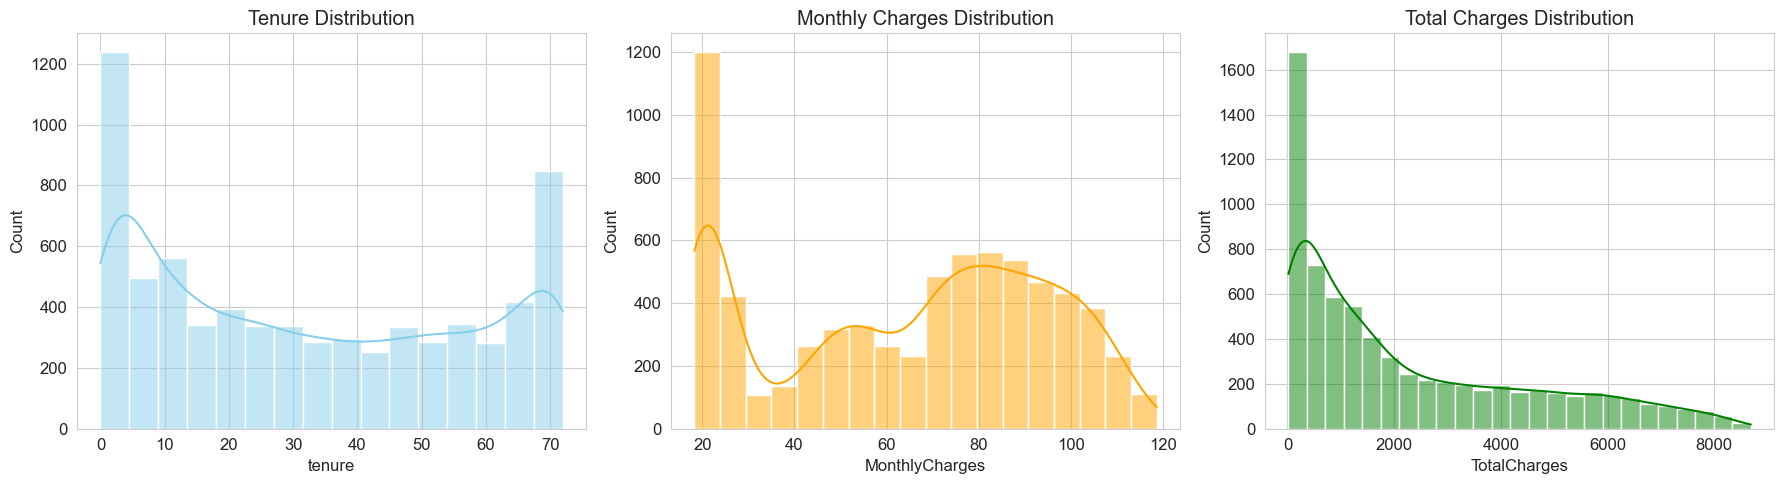

In [326]:
# Numerical Features Distribution
# The sample plots numerical features to see their shape (Normal vs Skewed).
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure
sns.histplot(df['tenure'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Tenure Distribution')

# Monthly Charges
sns.histplot(df['MonthlyCharges'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Monthly Charges Distribution')

# Total Charges
sns.histplot(df['TotalCharges'], kde=True, ax=axes[2], color='green')
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


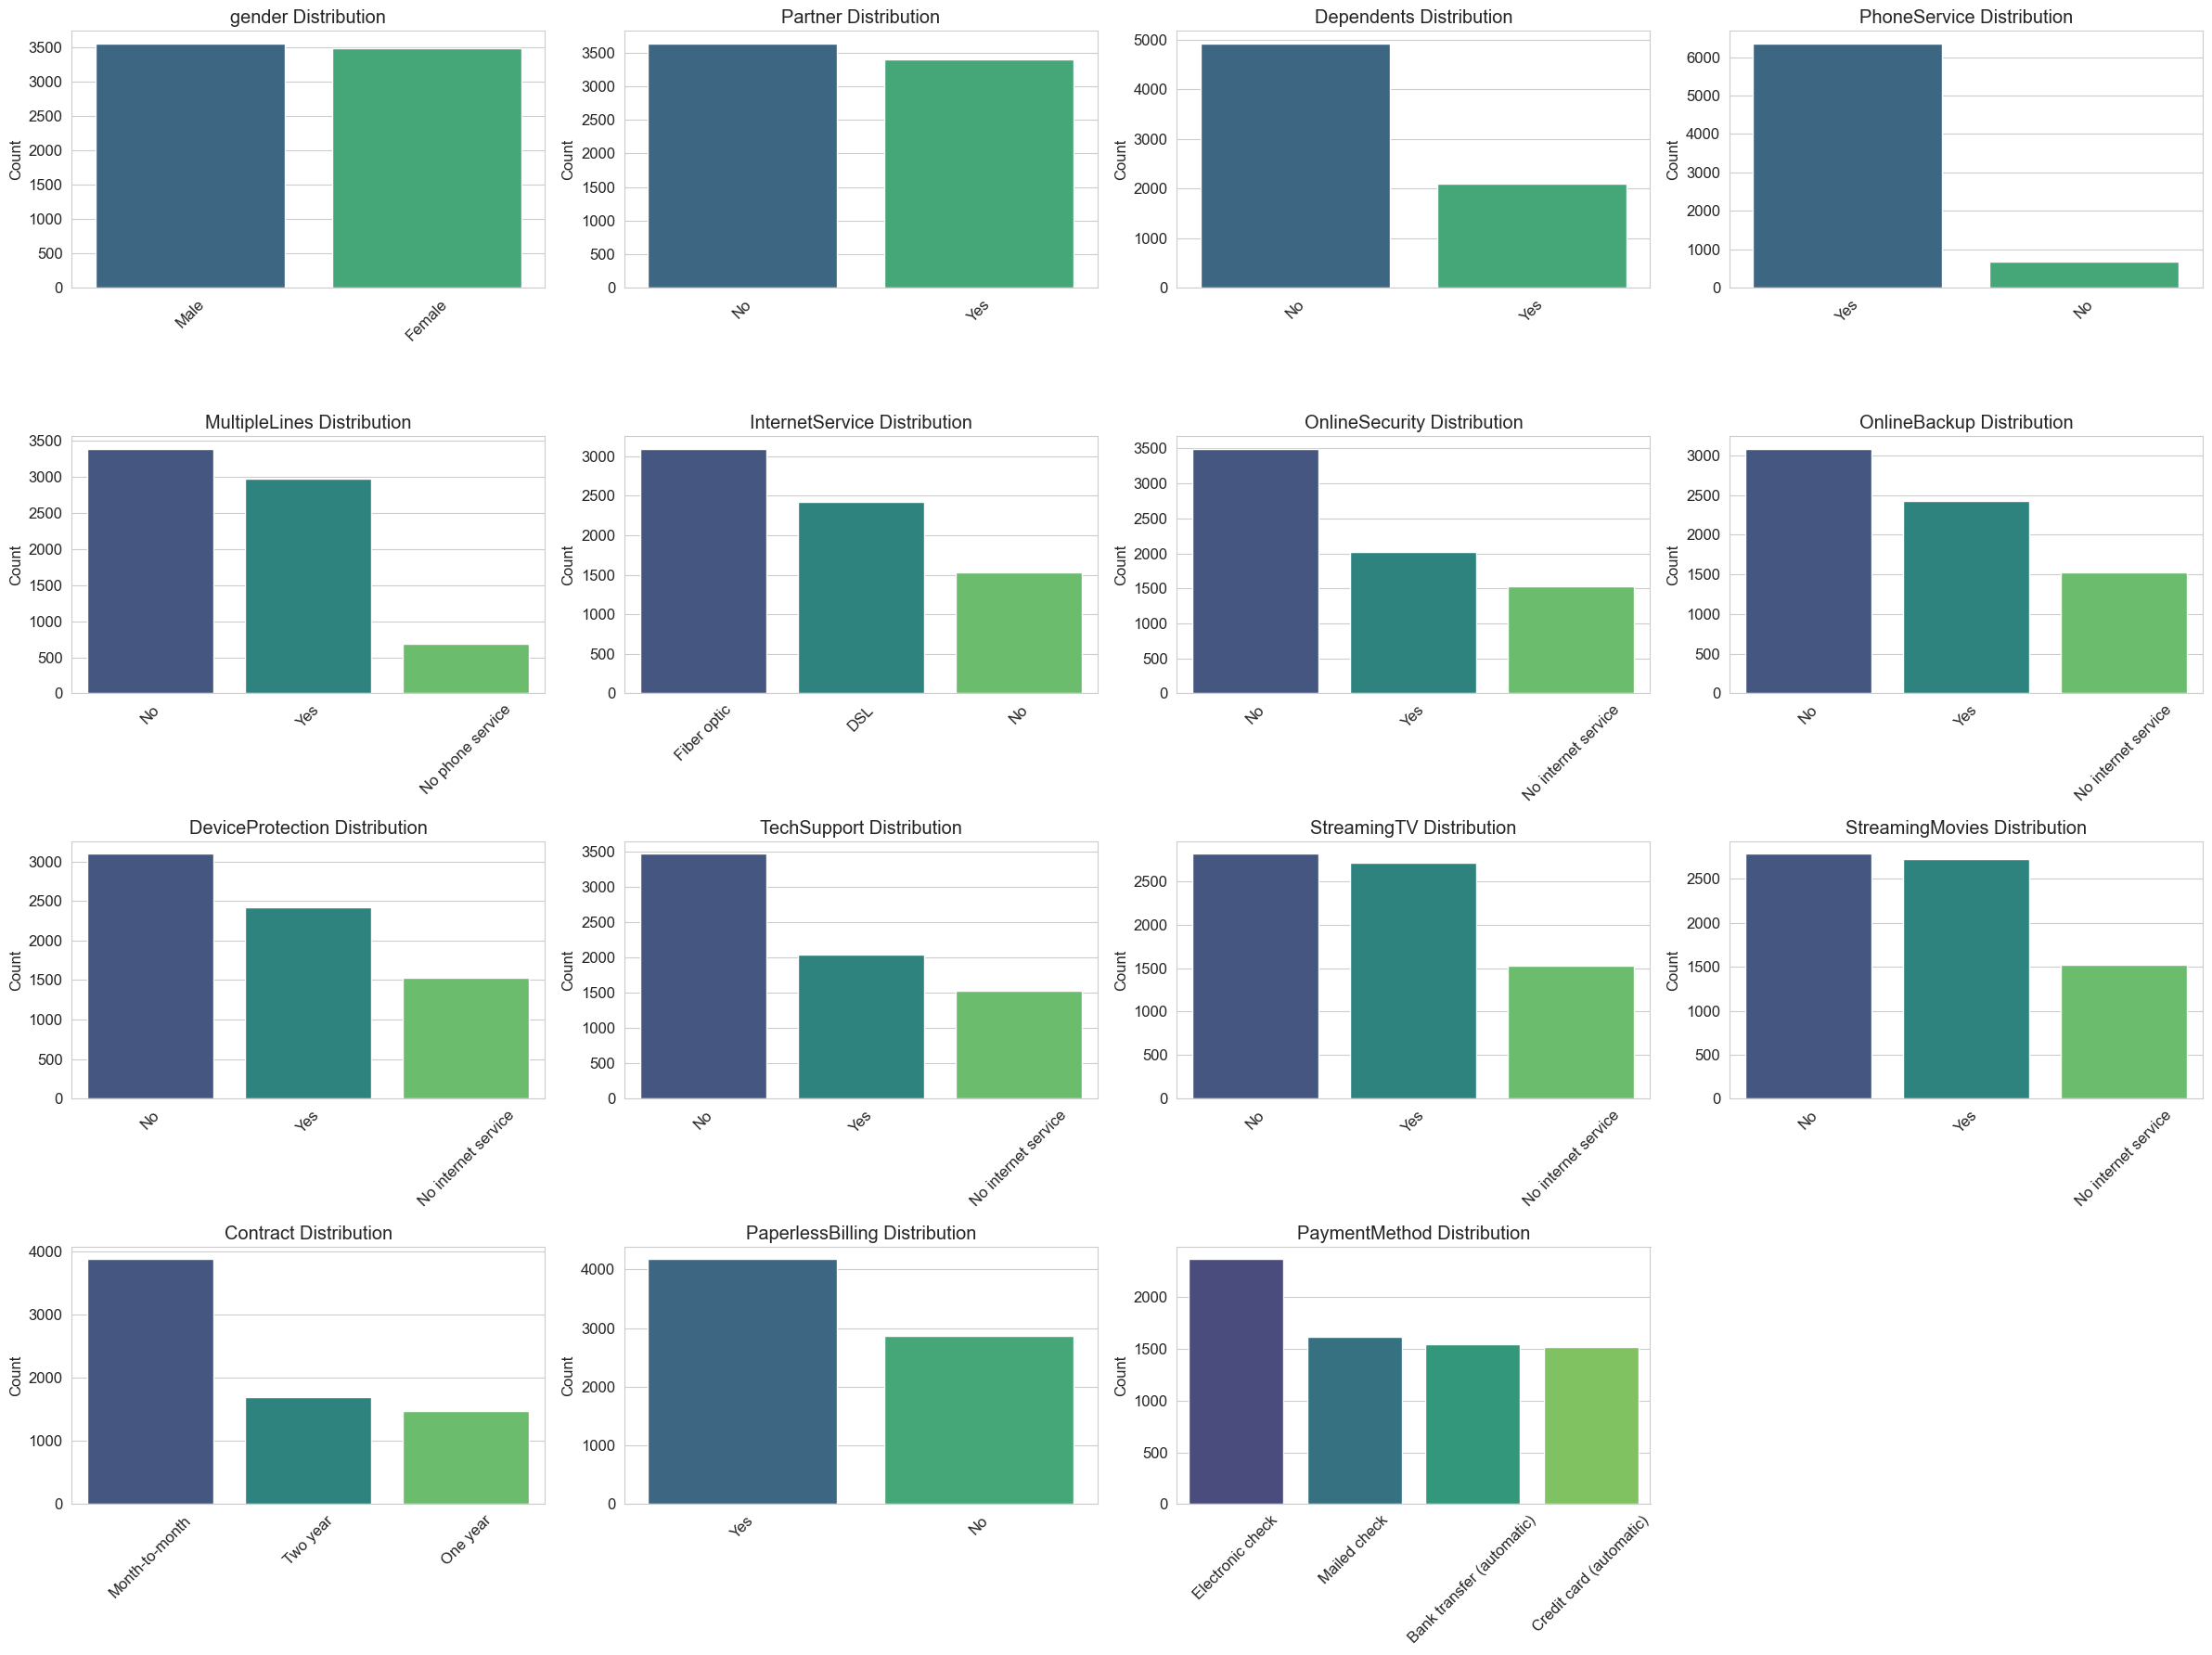

In [327]:
# CATEGORICAL FEATURE DISTRIBUTIONS
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c != "Churn"]  # exclude target

print("Categorical columns:", cat_cols)

n_cols = 4  # number of subplots per row
n_features = len(cat_cols)
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    order = df[col].value_counts().index
    
    sns.countplot(
        x=col,
        data=df,
        order=order,
        palette="viridis",
        ax=ax
    )
    
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

# Remove empty subplots if the grid is not full
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Bivariate Analysis

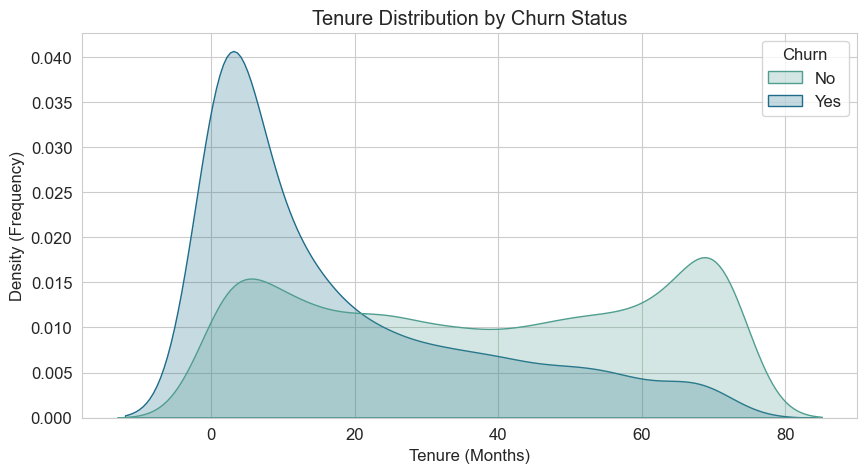

In [328]:
# Tenure vs Churn (Customer Loyalty)
plt.figure(figsize=(10, 5))
sns.kdeplot(
    data=df, 
    x='tenure', 
    hue='Churn', 
    fill=True, 
    palette='crest', 
    common_norm=False)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density (Frequency)')
plt.show()
# If the "Yes" curve spikes near 0-10 months, new customers are at highest risk.

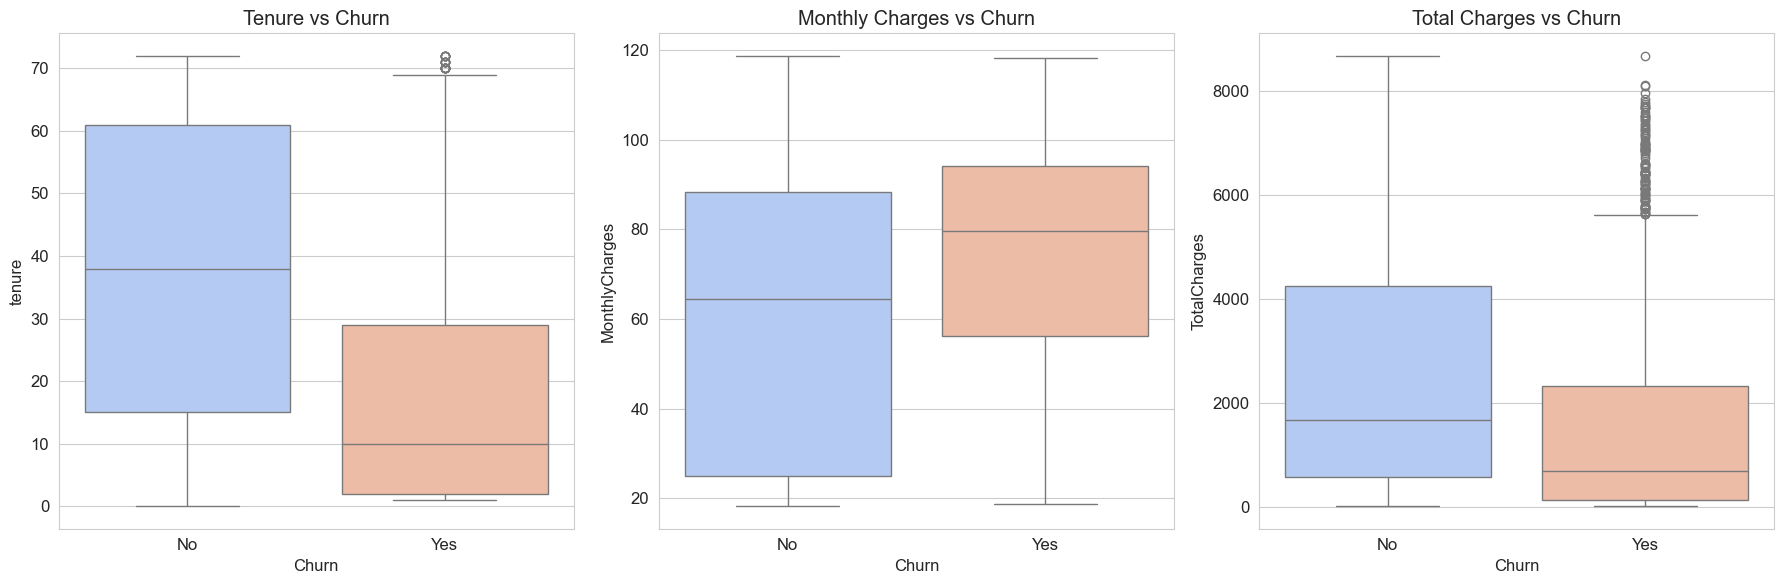

In [329]:
# Boxplots for key numerical features vs Churn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x="Churn", y="tenure", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title("Tenure vs Churn")

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")

sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title("Total Charges vs Churn")

plt.tight_layout()
plt.show()

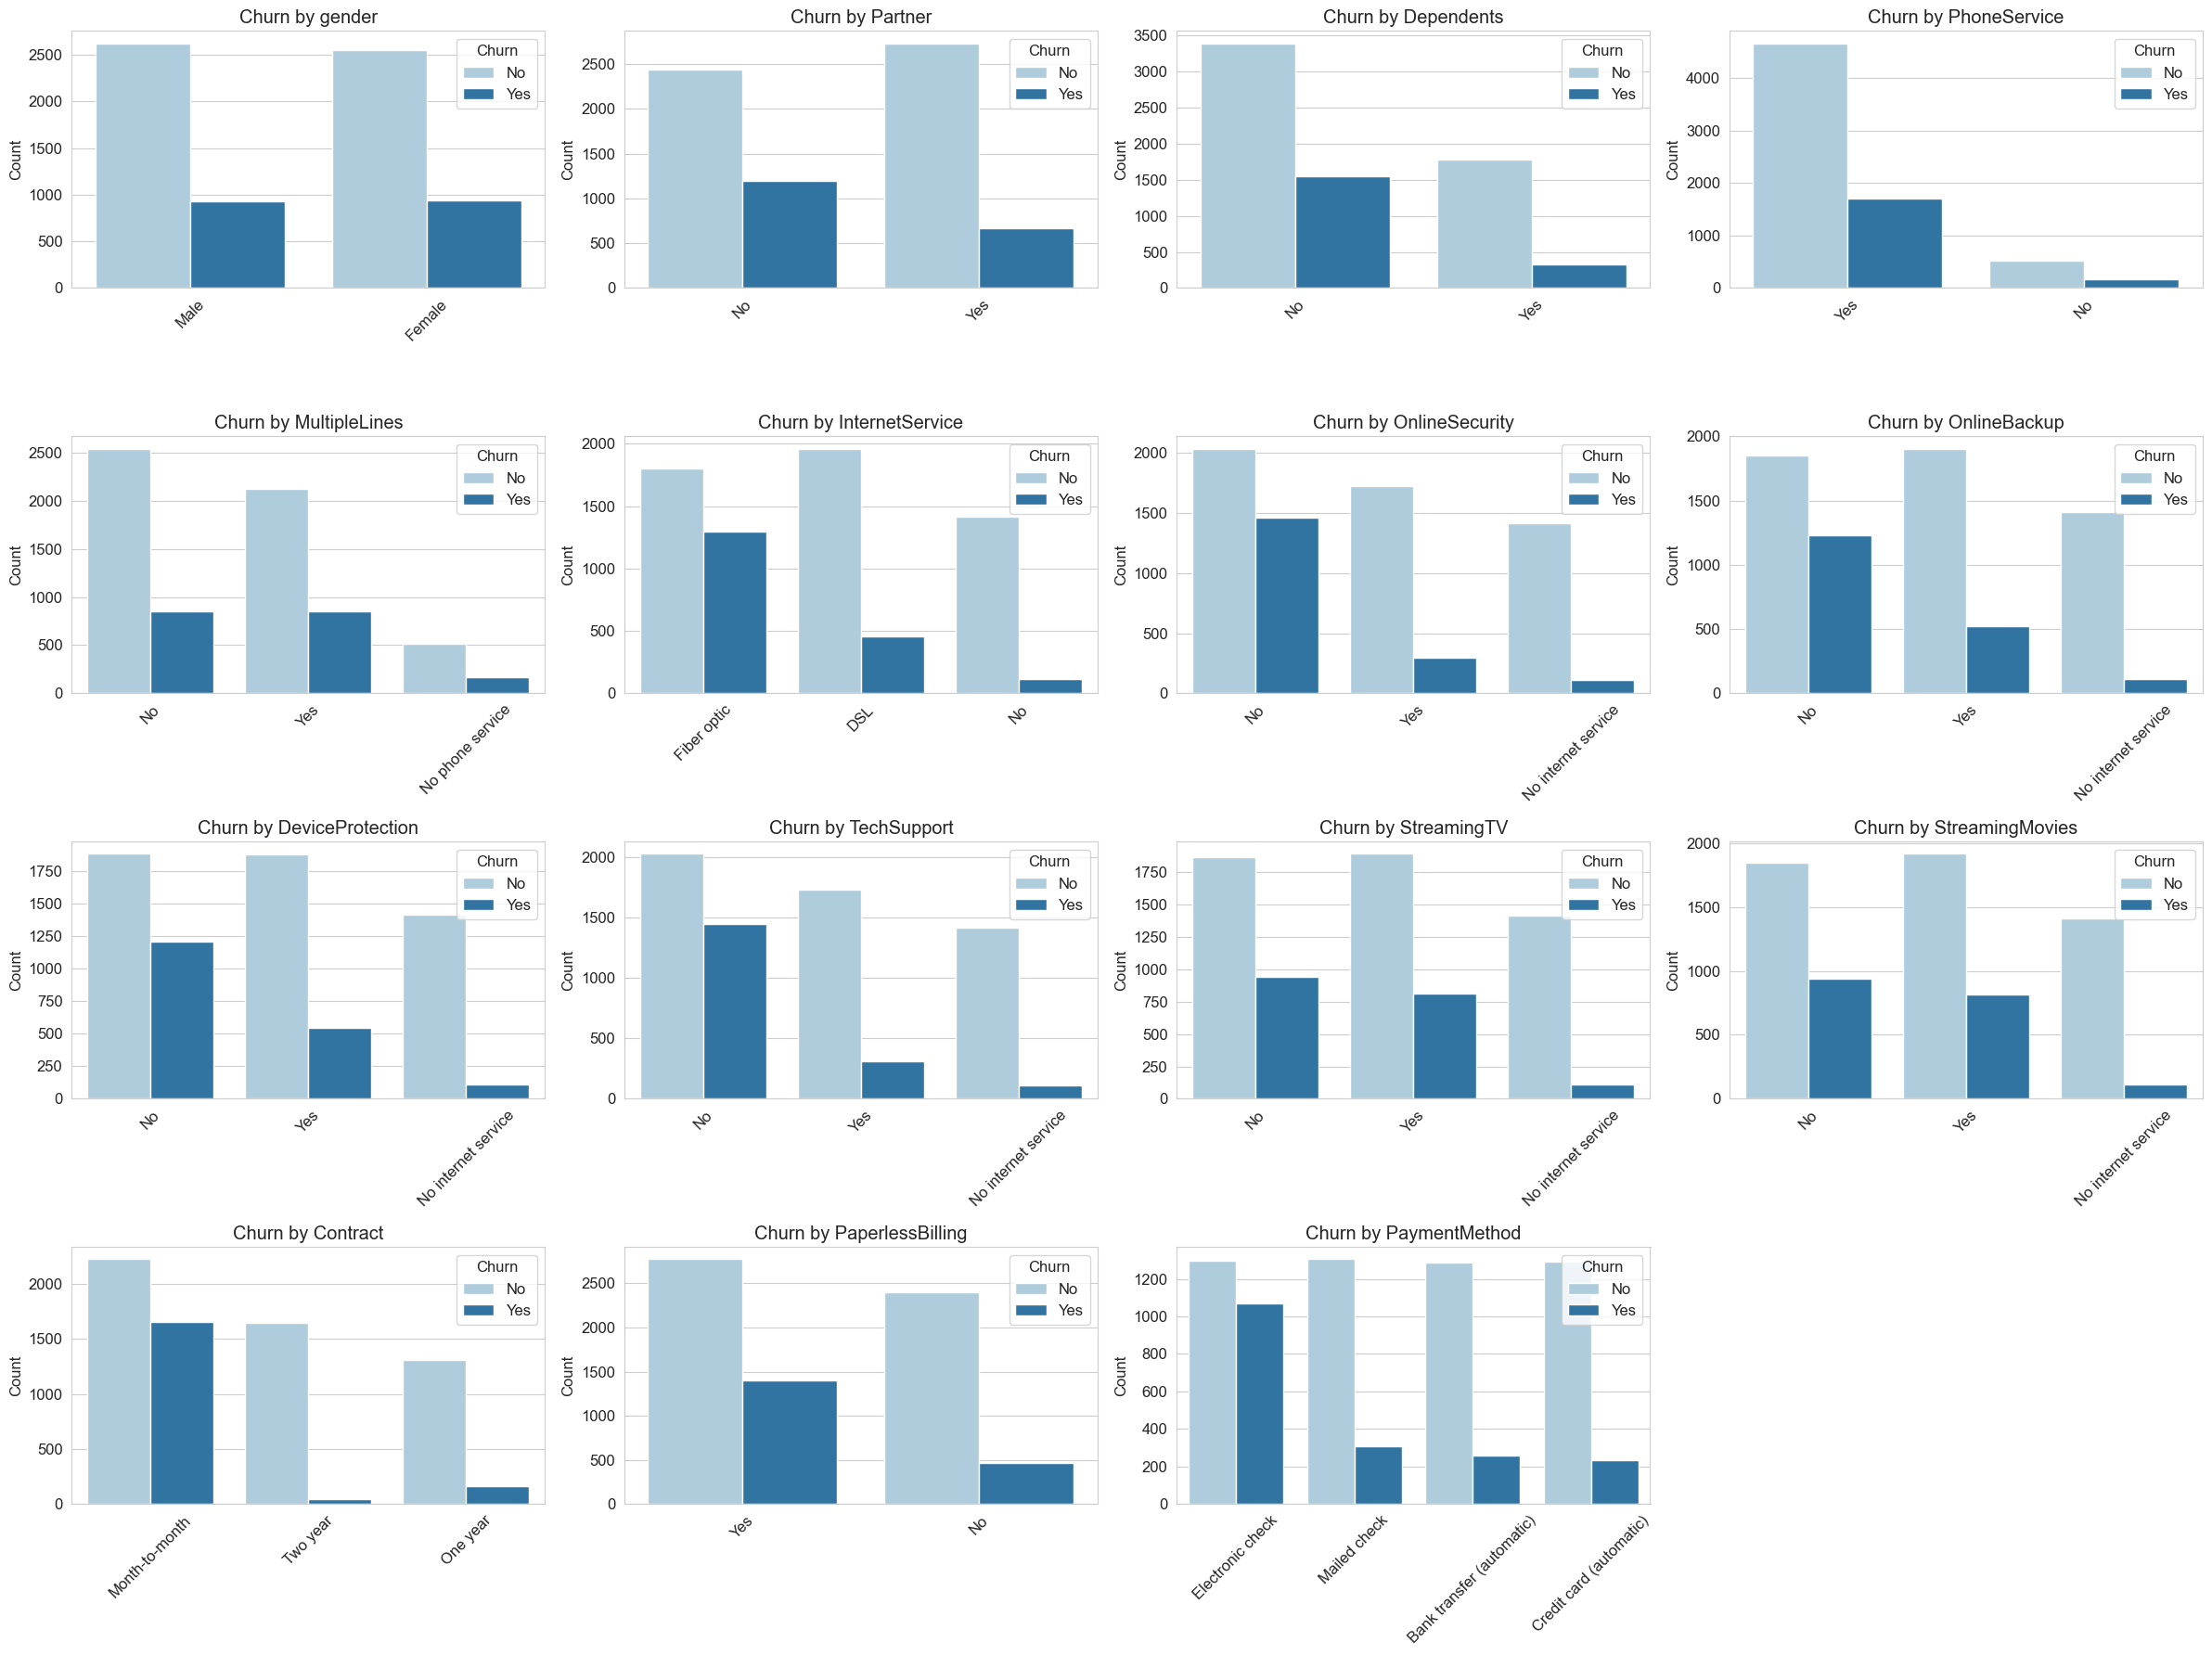

In [330]:
# CATEGORICAL FEATURES VS CHURN 

n_cols = 4  
n_features = len(cat_cols)
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.5 * n_rows))
axes = axes.flatten()  # make it 1D for easy indexing

for i, col in enumerate(cat_cols):
    ax = axes[i]
    order = df[col].value_counts().index
    sns.countplot(
        x=col,
        hue="Churn",
        data=df,
        order=order,
        palette="Paired",
        ax=ax
    )
    ax.set_title(f"Churn by {col}")
    ax.set_xlabel("")          # optional: cleaner axis labels
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

# Hide any unused subplots (if cat_cols doesn't fill the grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


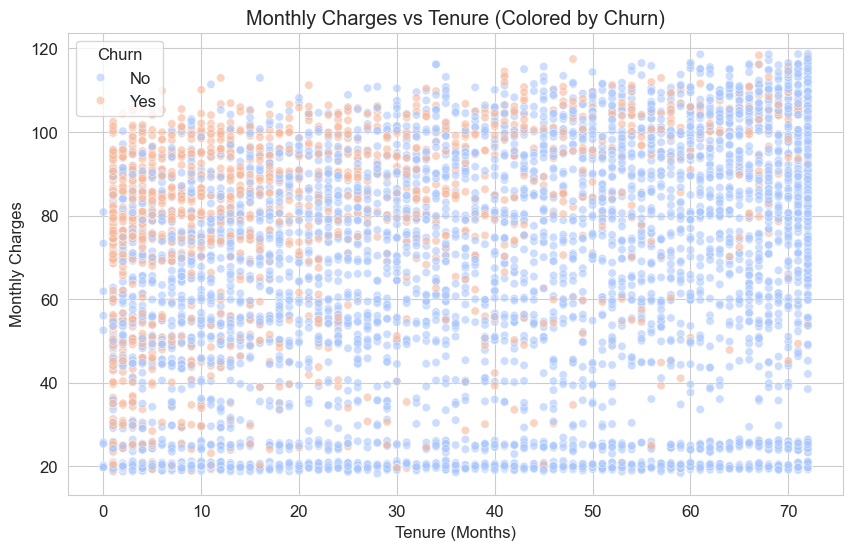

In [331]:
# TENURE VS MONTHLY CHARGES (BY CHURN)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="tenure",
    y="MonthlyCharges",
    hue="Churn",
    alpha=0.6,
    palette="coolwarm"
)
plt.title("Monthly Charges vs Tenure (Colored by Churn)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.show()

# Insight in report:
# Look at the high MonthlyCharges / low Tenure region:
# if many churned customers are there, expensive plans may drive away new users.


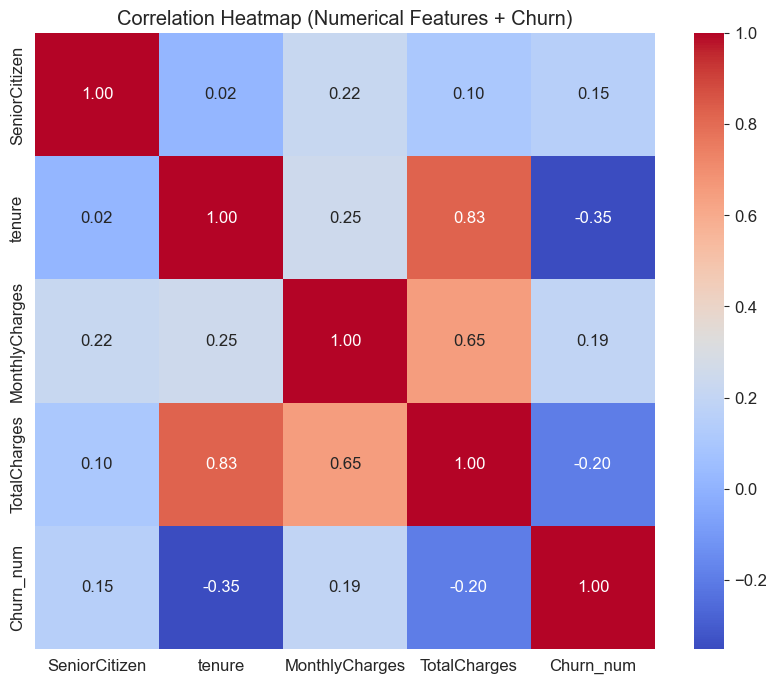

In [332]:
#CORRELATION HEATMAP
df_corr = df.copy()
df_corr["Churn_num"] = df_corr["Churn"].map({"Yes": 1, "No": 0})

numeric_df = df_corr.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features + Churn)")
plt.show()

### STATISTICAL TESTS 

In [333]:
# Chi-square tests for association between each categorical feature and Churn
chi2_results = []

for col in cat_cols:
    contingency = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({"feature": col, "p_value": p})

chi2_df = pd.DataFrame(chi2_results).sort_values("p_value")

print("\nChi-square test p-values (categorical features vs Churn):")
display(chi2_df)

# T-tests for numeric features vs Churn
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Churn"]  # keep numeric predictors

ttest_results = []
churn_yes = df[df["Churn"] == "Yes"]
churn_no = df[df["Churn"] == "No"]

for col in numeric_cols:
    t_stat, p = ttest_ind(churn_yes[col], churn_no[col], equal_var=False)
    ttest_results.append({"feature": col, "p_value": p})

ttest_df = pd.DataFrame(ttest_results).sort_values("p_value")

print("\nT-test p-values (numeric features vs Churn):")
display(ttest_df)



Chi-square test p-values (categorical features vs Churn):


,feature,p_value
12,Contract,5.863038e-258
6,OnlineSecurity,2.661150e-185
9,TechSupport,1.443084e-180
5,InternetService,9.571788e-160
14,PaymentMethod,3.682355e-140
7,OnlineBackup,2.079759e-131
8,DeviceProtection,5.505219e-122
11,StreamingMovies,2.667757e-82
10,StreamingTV,5.528994e-82
13,PaperlessBilling,4.073355e-58



T-test p-values (numeric features vs Churn):


,feature,p_value
1,tenure,1.195495e-232
3,TotalCharges,2.059075e-75
2,MonthlyCharges,8.592449e-73
0,SeniorCitizen,3.587587e-29


### ENCODING & SCALING

In [334]:
df_ml = df.copy()

# Encode target
df_ml["Churn"] = df_ml["Churn"].map({"Yes": 1, "No": 0})

# One-hot encoding
df_encoded = pd.get_dummies(df_ml, drop_first=True)

# Scale numerical features
scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

print("Encoded + scaled dataset:")
display(df_encoded.head())

Encoded + scaled dataset:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### SAVE PREPROCESSED DATASET

In [335]:
os.makedirs("preprocessed_dataset", exist_ok=True)
output_path = "preprocessed_dataset/preprocessed_data.csv"

df_encoded.to_csv(output_path, index=False)

print("Preprocessing complete!")
print(f"Saved to: {output_path}")


Preprocessing complete!
Saved to: preprocessed_dataset/preprocessed_data.csv
